In [12]:
import pandas as pd
df = pd.read_csv('/content/champagne.csv')
df

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
...,...,...
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [14]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [15]:
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='MS')
missing_months = full_range.difference(df.index)
print("Các tháng bị thiếu:", missing_months)

Các tháng bị thiếu: DatetimeIndex([], dtype='datetime64[ns]', freq='MS')


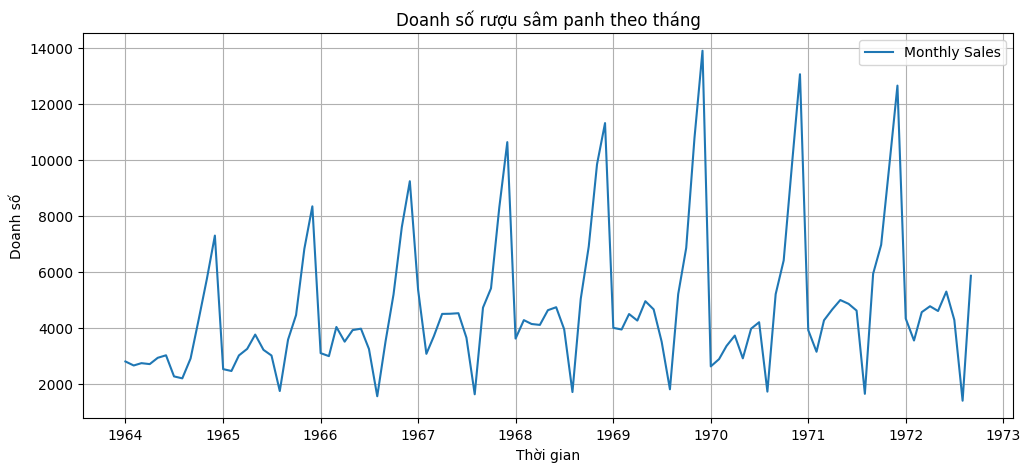

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.asfreq('MS')
series = df['Sales']

plt.figure(figsize=(12, 5))
plt.plot(series, label='Monthly Sales')
plt.title('Doanh số rượu sâm panh theo tháng')
plt.xlabel('Thời gian')
plt.ylabel('Doanh số')
plt.legend()
plt.grid(True)
plt.show()

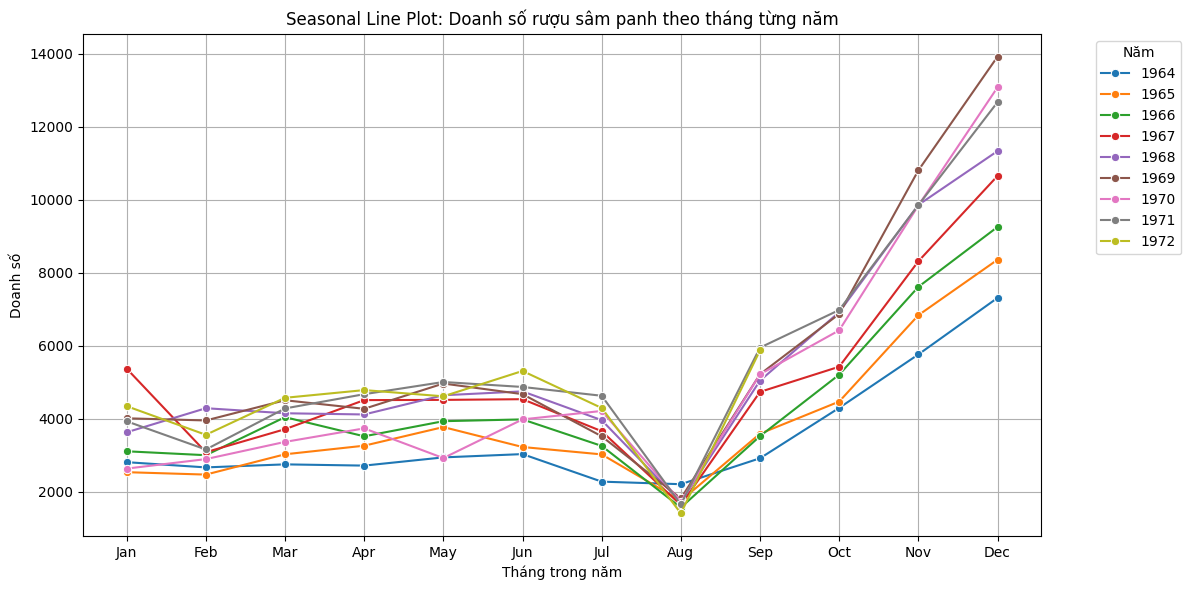

In [17]:
df['Month'] = pd.to_datetime(df['Month'])
df['Year'] = df['Month'].dt.year
df['Month_Num'] = df['Month'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month_Num', y='Sales', hue='Year', palette='tab10', marker='o')

plt.title('Seasonal Line Plot: Doanh số rượu sâm panh theo tháng từng năm')
plt.xlabel('Tháng trong năm')
plt.ylabel('Doanh số')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Năm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


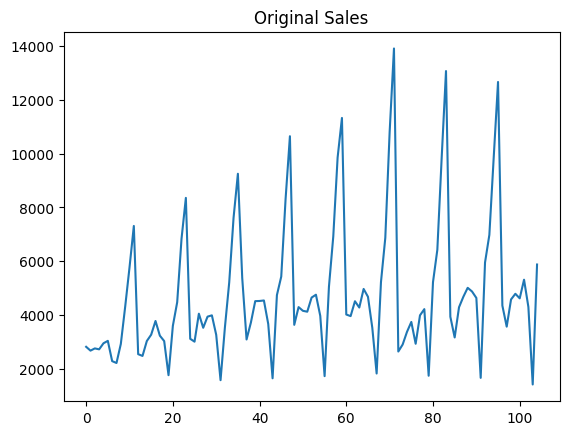

ADF Statistic: -1.8335930563276215
p-value: 0.36391577166024586


In [18]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Vẽ dữ liệu gốc
df['Sales'].plot(title='Original Sales')
plt.show()

# Kiểm định ADF
result = adfuller(df['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


In [23]:
# 2. Kiểm định ADF cho chuỗi gốc
result = adfuller(df['Sales'].dropna())
print("ADF Test on Original Series")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Test on Original Series
ADF Statistic: -1.8335930563276215
p-value: 0.36391577166024586
Critical Values:
   1%: -3.502704609582561
   5%: -2.8931578098779522
   10%: -2.583636712914788


In [24]:
diff1 = df['Sales'].diff().dropna()
result_diff1 = adfuller(diff1)
print("\nADF Test on First Difference")
print(f"ADF Statistic: {result_diff1[0]}")
print(f"p-value: {result_diff1[1]}")
print("Critical Values:")
for key, value in result_diff1[4].items():
    print(f"   {key}: {value}")


ADF Test on First Difference
ADF Statistic: -7.189896448050999
p-value: 2.519620447387081e-10
Critical Values:
   1%: -3.503514579651927
   5%: -2.893507960466837
   10%: -2.583823615311909


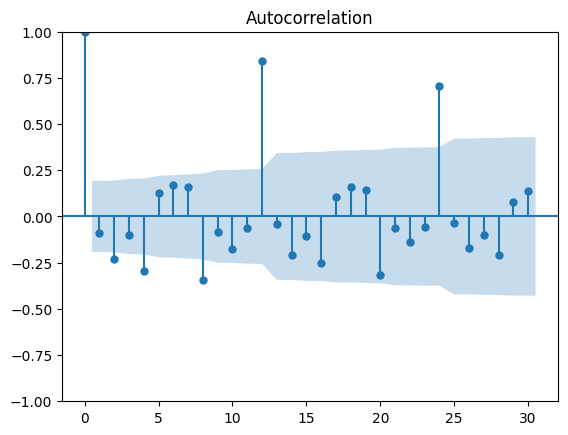

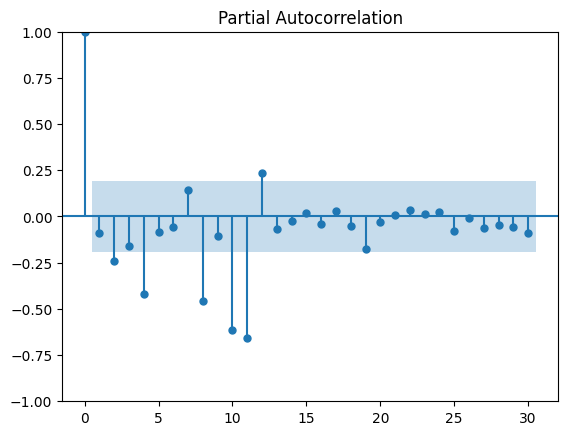

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Sai phân 1 lần (non-seasonal)
diff = df['Sales'].diff().dropna()
plot_acf(diff, lags=30)
plot_pacf(diff, lags=30)
plt.show()


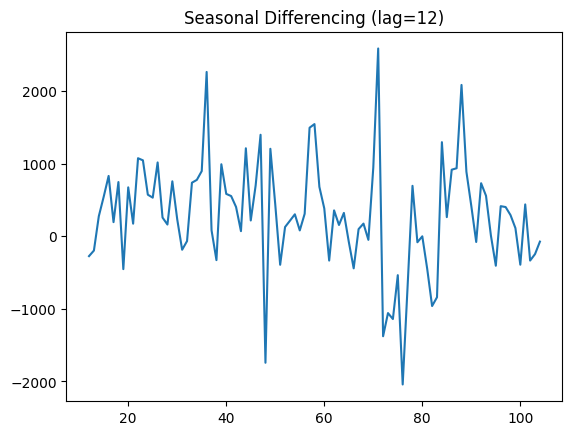

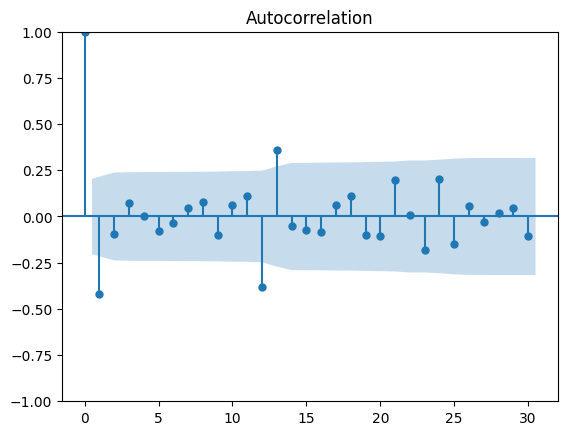

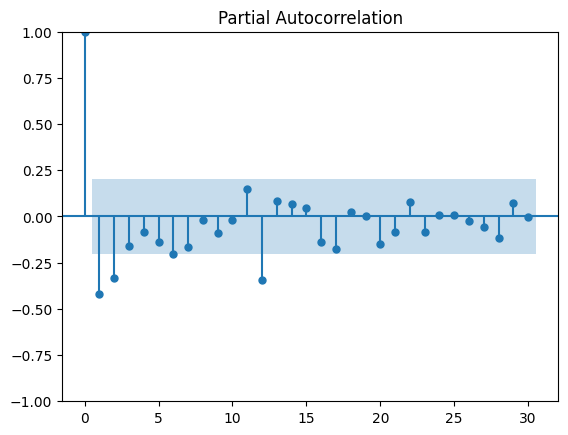

In [26]:
# Seasonal differencing
seasonal_diff = df['Sales'].diff(12).dropna()
seasonal_diff.plot(title='Seasonal Differencing (lag=12)')
plt.show()

# Kết hợp cả differencing thường và mùa vụ
seasonal_diff2 = df['Sales'].diff().diff(12).dropna()

plot_acf(seasonal_diff2, lags=30)
plot_pacf(seasonal_diff2, lags=30)
plt.show()


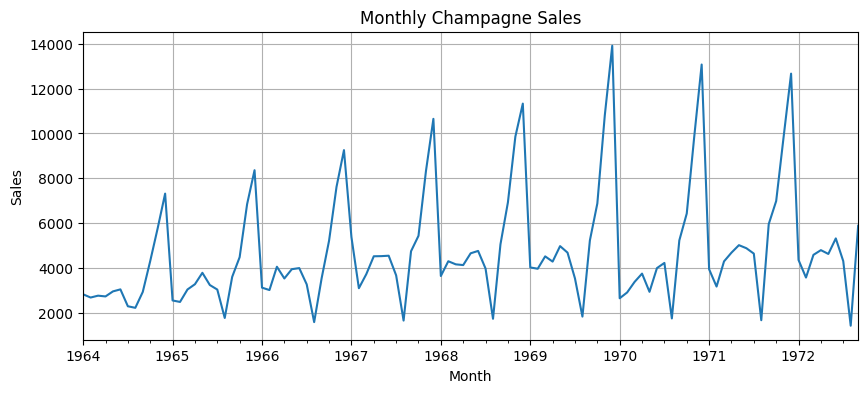

ADF Statistic: -1.8335930563276215
p-value: 0.36391577166024586


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -627.564
Date:                            Tue, 03 Jun 2025   AIC                           1263.128
Time:                                    10:48:17   BIC                           1272.555
Sample:                                01-01-1964   HQIC                          1266.902
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2526      0.084      3.004      0.003       0.088       0.417
ma.L1         -0.9539      0.052   

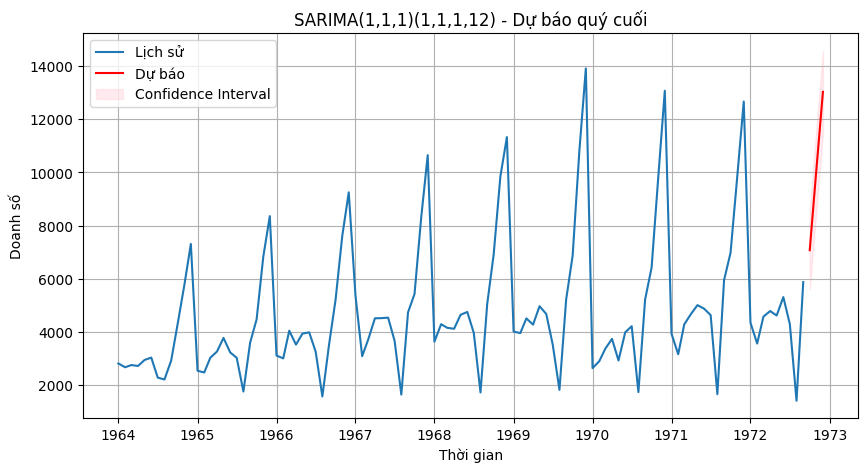

Dự báo doanh số quý cuối năm:
1972-10-01     7075.798867
1972-11-01    10134.913315
1972-12-01    13034.172233
Freq: MS, dtype: float64


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ---------------------
# 1. Đọc dữ liệu mẫu
# ---------------------
df = pd.read_csv('/content/champagne.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# ---------------------
# 2. Vẽ chuỗi thời gian gốc
# ---------------------
df['Sales'].plot(title='Monthly Champagne Sales', figsize=(10,4))
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# ---------------------
# 3. Kiểm định ADF - xem chuỗi có dừng không
# ---------------------
adf_result = adfuller(df['Sales'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
# Nếu p-value > 0.05, chuỗi không dừng → cần sai phân

# ---------------------
# 4. Fit SARIMA(1,1,1)(1,1,1,12)
# ---------------------
model = SARIMAX(df['Sales'],
                order=(1,1,1),
                seasonal_order=(0,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

# ---------------------
# 5. Dự báo 3 tháng tiếp theo (quý cuối năm)
# ---------------------
forecast_steps = 3
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_steps, freq='MS')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
conf_int = forecast.conf_int()

# ---------------------
# 6. Vẽ kết quả dự báo
# ---------------------
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Lịch sử')
plt.plot(forecast_series, label='Dự báo', color='red')
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA(1,1,1)(1,1,1,12) - Dự báo quý cuối')
plt.xlabel('Thời gian')
plt.ylabel('Doanh số')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------
# 7. In kết quả dự báo
# ---------------------
print("Dự báo doanh số quý cuối năm:")
print(forecast_series)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE: 492.53
MAE: 461.90
MAPE: 19.29 %


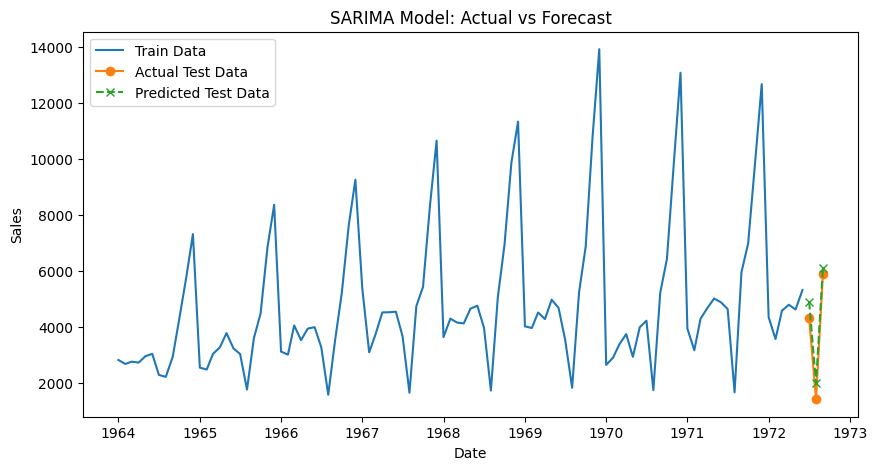

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('/content/champagne.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# 2. Tách dữ liệu train/test
train = df.iloc[:-3]  # lấy đến tháng 1965-09
test = df.iloc[-3:]   # tháng 1965-10,11,12 để kiểm tra

# 3. Huấn luyện mô hình SARIMA (tham số ví dụ)
model = SARIMAX(train['Sales'], order=(1,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit(disp=False)

# 4. Dự báo 3 tháng cuối năm trên tập test
forecast = model_fit.get_forecast(steps=3)
predicted = forecast.predicted_mean
predicted.index = test.index  # đặt đúng index để dễ so sánh

# 5. Tính các chỉ số đánh giá
rmse_val = np.sqrt(mean_squared_error(test['Sales'], predicted))
mae_val = mean_absolute_error(test['Sales'], predicted)
mape_val = np.mean(np.abs((test['Sales'] - predicted) / test['Sales'])) * 100

print(f"RMSE: {rmse_val:.2f}")
print(f"MAE: {mae_val:.2f}")
print(f"MAPE: {mape_val:.2f} %")

# 6. Vẽ biểu đồ so sánh thực tế và dự báo
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Sales'], label='Train Data')
plt.plot(test.index, test['Sales'], label='Actual Test Data', marker='o')
plt.plot(predicted.index, predicted, label='Predicted Test Data', marker='x', linestyle='--')
plt.title('SARIMA Model: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
